# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [7]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train的维度:  (76053, 10)
X_test的维度:  (32595, 10)
y_train的维度:  (76053,)
y_test的维度:  (32595,)


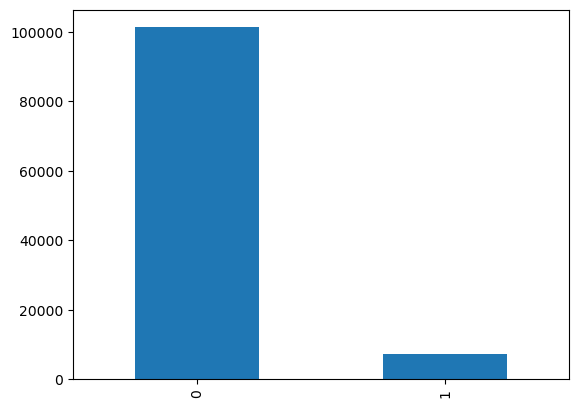

In [8]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts


# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')

# 将数据切分成70%训练集，30%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 打印训练集和测试集的维度
print("X_train的维度: ", X_train.shape)
print("X_test的维度: ", X_test.shape)
print("y_train的维度: ", y_train.shape)
print("y_test的维度: ", y_test.shape)

# 绘制'SeriousDlqin2yrs'的值的分布图
data['SeriousDlqin2yrs'].value_counts().plot(kind='bar')
plt.show()

#### 2.数据预处理之离散化

In [9]:
import numpy as np
import pandas as pd

In [10]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
np.max(data.age),np.min(data.age)

(103.0, 0.0)

In [ ]:
data.age=pd.cut(data.age,34)
data.head

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,"(42.412, 45.441]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,"(39.382, 42.412]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,"(36.353, 39.382]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,"(27.265, 30.294]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,"(48.471, 51.5]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [12]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
age=pd.get_dummies(data,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,"(42.412, 45.441]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,"(39.382, 42.412]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,"(36.353, 39.382]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,"(27.265, 30.294]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,"(48.471, 51.5]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112910,0,0.385742,"(48.471, 51.5]",0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0,0.040674,"(72.706, 75.735]",0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0,0.299745,"(42.412, 45.441]",0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0,0.000000,"(27.265, 30.294]",0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


#### 4.数据预处理之幅度缩放

In [13]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)
X_train_std.shape

(76053, 10)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [14]:
# 提示：fit建模，建完模之后可以取出coef属性

from sklearn.linear_model import LogisticRegression

# 创建LogisticRegression对象
logistic_regression = LogisticRegression(C=1000, random_state=0)

# 使用归一化后的训练集拟合模型
logistic_regression.fit(X_train_std, y_train)

# 计算模型在训练集上的准确率
lr_score = logistic_regression.score(X_train_std, y_train)

# 打印准确率
print('逻辑回归模型的准确率:', lr_score)

# 获取特征标签
feature_labels = data.columns[1:]

# 获取模型的系数
coefficients = logistic_regression.coef_

# 对系数进行排序，得到排序后的索引
indices = np.argsort(coefficients[0])[::-1]

# 打印每个特征的系数
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f, 30, feature_labels[indices[f]], coefficients[0, indices[f]]))

逻辑回归模型的准确率: 0.9331255834746821
 0) NumberOfTime30-59DaysPastDueNotWorse 1.728912
 1) NumberOfTimes90DaysLate        1.689809
 2) DebtRatio                      0.312105
 3) NumberOfDependents             0.116392
 4) RevolvingUtilizationOfUnsecuredLines -0.014283
 5) NumberOfOpenCreditLinesAndLoans -0.091882
 6) MonthlyIncome                  -0.115199
 7) NumberRealEstateLoansOrLines   -0.196429
 8) age                            -0.364299
 9) NumberOfTime60-89DaysPastDueNotWorse -3.248789


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [15]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 定义超参数网格
param_grid = {'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']}

# 创建GridSearchCV对象
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# 使用训练集拟合模型
grid_search.fit(X_train, y_train)

# 计算模型在测试集上的准确率
score = grid_search.score(X_test, y_test)
print(score)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9332106151250191


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:
# 输出最好的超参数
# 输出最好的模型

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# 将网格搜索的结果转换为DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# 打印最优参数、交叉验证的平均精度和最佳参数对应的模型
print("最优参数: ", best_params)
print('交叉验证的平均精度: ', best_score)
print('最佳参数对应的模型: ', best_estimator)

最优参数:  {'C': 500, 'penalty': 'l2'}
交叉验证的平均精度:  0.9323498103447836
最佳参数对应的模型:  LogisticRegression(C=500)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  


Precision： [0.93339469        nan]
recall： 0.5
auc： 0.5
f1_score： [0.65117772        nan]


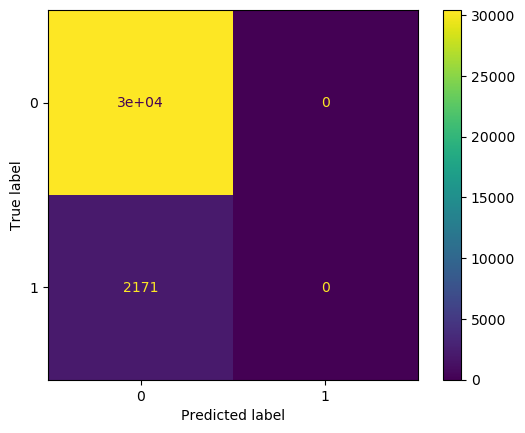

In [17]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# 使用训练好的模型对测试集进行预测
y_pred = logistic_regression.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Precision
precision = np.diag(cm) / np.sum(cm, axis=0)
print('Precision：', precision)

# 计算recall
recall = recall_score(y_test, y_pred, average='macro')
print('recall：', recall)

# AUC
auc_score = roc_auc_score(y_test, y_pred)
print('auc：', auc_score)

# f1_score
f1_score = 2 * precision * recall / (precision + recall)
print('f1_score：', f1_score)

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [18]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

from sklearn.preprocessing import binarize

# 使用模型对测试集进行预测，得到预测概率
y_pred_prob1 = logistic_regression.predict_proba(X_test_std)[:, 1]

# 设置阈值为0.3，大于阈值的预测为正类，小于阈值的预测为负类
y_pred_class1 = binarize(y_pred_prob1.reshape(-1, 1), threshold=0.3)[:, 0]

# 打印10个预测概率
print(y_pred_prob1[60:70])

[0.0642311  0.20988949 0.03502916 0.0584916  0.1242977  0.01441846
 0.05474367 0.03497128 0.04735923 0.04628838]


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [19]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.tree import DecisionTreeClassifier

# 创建DecisionTreeClassifier对象
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# 获取特征标签
feature_labels = data.columns[1:]

# 使用训练集拟合模型
decision_tree.fit(X_train, y_train)

# 计算模型在测试集上的准确率
score = decision_tree.score(X_test, y_test)

# 打印准确率
print('决策树模型的准确率:', score)

# 获取特征的重要度
importances = decision_tree.feature_importances_

# 对重要度进行排序，得到排序后的索引
indices = np.argsort(importances)[::-1]

# 打印每个特征的重要度
for f in range(X_train.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1, feature_labels[indices[f]], importances[indices[f]]))

决策树模型的准确率: 0.9326277036355269
1    NumberOfTimes90DaysLate                  0.3693185649118574
2    RevolvingUtilizationOfUnsecuredLines     0.24588926348984813
3    NumberOfTime30-59DaysPastDueNotWorse     0.11491132233214726
4    DebtRatio                                0.0676451096543915
5    NumberOfTime60-89DaysPastDueNotWorse     0.05436213149335343
6    MonthlyIncome                            0.05008933355959061
7    age                                      0.04844110303371473
8    NumberOfOpenCreditLinesAndLoans          0.03094781279494675
9    NumberOfDependents                       0.009548122872741384
10   NumberRealEstateLoansOrLines             0.00884723585740895


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [20]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

# 获取特征标签
feature_labels1 = data.columns[1:]

# 创建RandomForestClassifier对象，设置决策树的划分准则为'entropy'，树的数量为100
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1, n_jobs=2)

# 使用训练集拟合模型
forest.fit(X_train, y_train)

# 计算模型在测试集上的准确率
score1 = forest.score(X_test, y_test)

# 打印准确率
print('随机森林模型的准确率:', score1)

# 获取特征的重要度
importances1 = forest.feature_importances_

# 对重要度进行排序，得到排序后的索引
indices1 = np.argsort(importances1)[::-1]

# 打印每个特征的重要度
for f in range(X_train.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1, feature_labels1[indices1[f]], importances1[indices1[f]]))

随机森林模型的准确率: 0.9361251725724804
1    RevolvingUtilizationOfUnsecuredLines     0.2119144598556748
2    DebtRatio                                0.16316322755987717
3    MonthlyIncome                            0.1542280271681003
4    age                                      0.12100764481737607
5    NumberOfOpenCreditLinesAndLoans          0.08766735730785012
6    NumberOfTimes90DaysLate                  0.0863543468638677
7    NumberOfTime30-59DaysPastDueNotWorse     0.06205520362290955
8    NumberOfDependents                       0.0424617528308977
9    NumberOfTime60-89DaysPastDueNotWorse     0.040152420215271364
10   NumberRealEstateLoansOrLines             0.03099555975817525


In [21]:
# 支持向量机
from sklearn.svm import SVC
# 获取特征标签
feature_labels2 = data.columns[1:]

# 创建SVC对象，设置核函数为'linear'，C值为1.0，随机种子为0，类别权重为'balanced'，最大迭代次数为100000
support_vector_machine = SVC(kernel='linear', C=1.0, random_state=0, class_weight='balanced', max_iter=100000)

# 使用训练集拟合模型
support_vector_machine.fit(X_train, y_train)

# 计算模型在测试集上的准确率
score2 = support_vector_machine.score(X_test, y_test)

# 打印准确率
print('支持向量机模型的准确率:', score2)

# 获取模型的系数
coefficients2 = logistic_regression.coef_

# 对系数进行排序，得到排序后的索引
indices2 = np.argsort(coefficients2[0])[::-1]

# 打印每个特征的系数
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f, 30, feature_labels2[indices2[f]], coefficients2[0, indices2[f]]))

支持向量机模型的准确率: 0.9311244055836785
 0) NumberOfTime30-59DaysPastDueNotWorse 1.728912
 1) NumberOfTimes90DaysLate        1.689809
 2) DebtRatio                      0.312105
 3) NumberOfDependents             0.116392
 4) RevolvingUtilizationOfUnsecuredLines -0.014283
 5) NumberOfOpenCreditLinesAndLoans -0.091882
 6) MonthlyIncome                  -0.115199
 7) NumberRealEstateLoansOrLines   -0.196429
 8) age                            -0.364299
 9) NumberOfTime60-89DaysPastDueNotWorse -3.248789


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [22]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
# 获取特征标签
feature_labels3 = data.columns[1:]

# 创建KNeighborsClassifier对象，设置邻居数量为5，距离度量为'minkowski'
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

# 使用训练集拟合模型
k_nearest_neighbors.fit(X_train, y_train)

# 计算模型在训练集上的准确率
score3 = k_nearest_neighbors.score(X_train, y_train)

# 打印准确率
print('K近邻模型的准确率:', score3)

# 获取模型的系数
coefficients3 = logistic_regression.coef_

# 对系数进行排序，得到排序后的索引
indices3 = np.argsort(coefficients3[0])[::-1]

# 打印每个特征的系数
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f, 30, feature_labels3[indices3[f]], coefficients3[0, indices3[f]]))

K近邻模型的准确率: 0.9350847435341144
 0) NumberOfTime30-59DaysPastDueNotWorse 1.728912
 1) NumberOfTimes90DaysLate        1.689809
 2) DebtRatio                      0.312105
 3) NumberOfDependents             0.116392
 4) RevolvingUtilizationOfUnsecuredLines -0.014283
 5) NumberOfOpenCreditLinesAndLoans -0.091882
 6) MonthlyIncome                  -0.115199
 7) NumberRealEstateLoansOrLines   -0.196429
 8) age                            -0.364299
 9) NumberOfTime60-89DaysPastDueNotWorse -3.248789
